In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg


--2024-01-14 09:50:01--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/woman.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg [following]
--2024-01-14 09:50:02--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg.2’

woman.jpeg.2        100%[===================>]  16.96K  --.-KB/s    in 0s      

2024-01-14 09:50:02 (132 MB/s) - ‘woman.jpeg.2’ saved [17368/17368]



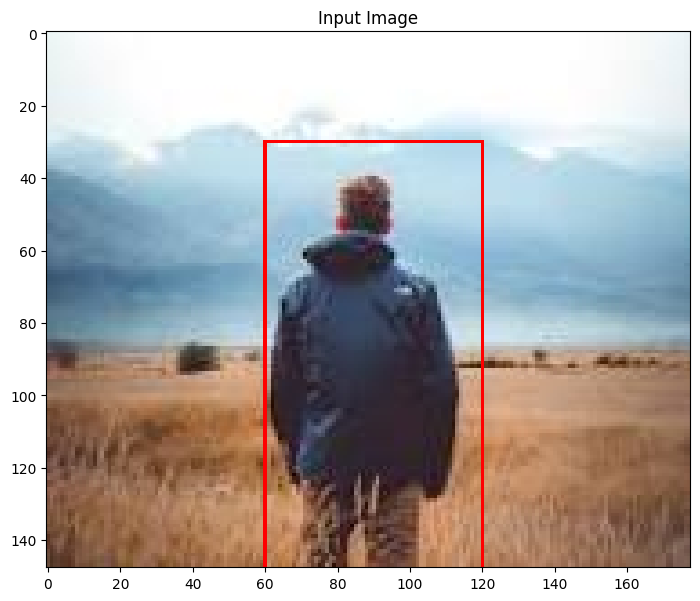

In [33]:
image = cv2.imread('/content/h.jpg')
copy = image.copy()
# Create a mask (of zeros uint8 datatype) that is the same size (width, height) as our original image
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Needs to be set Manually or selected with cv2.selectROI()
x1, y1, x2, y2 = 60, 30, 120, 150

start = (x1, y1)
end = (x2, y2)

# Format is X,Y,W,H
rect = (x1,y1,x2-x1,y2-y1)

# Show Rectangle
cv2.rectangle(copy, start, end, (0,0,255), 1)
imshow("Input Image", copy)

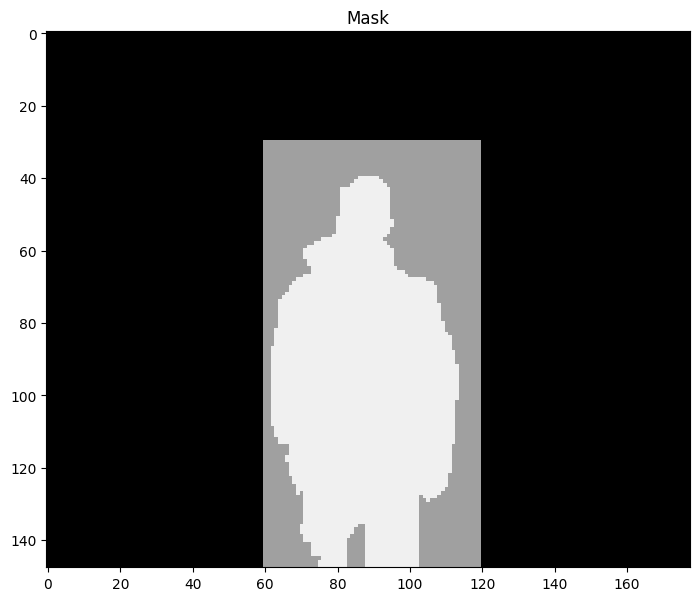

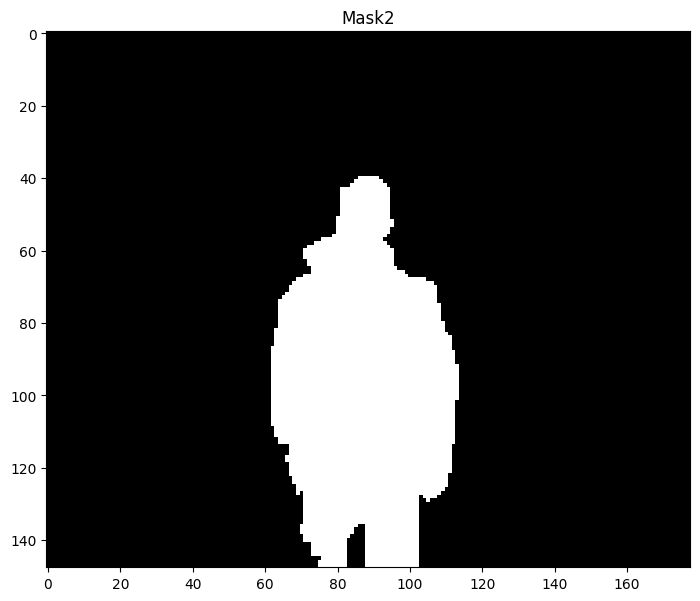

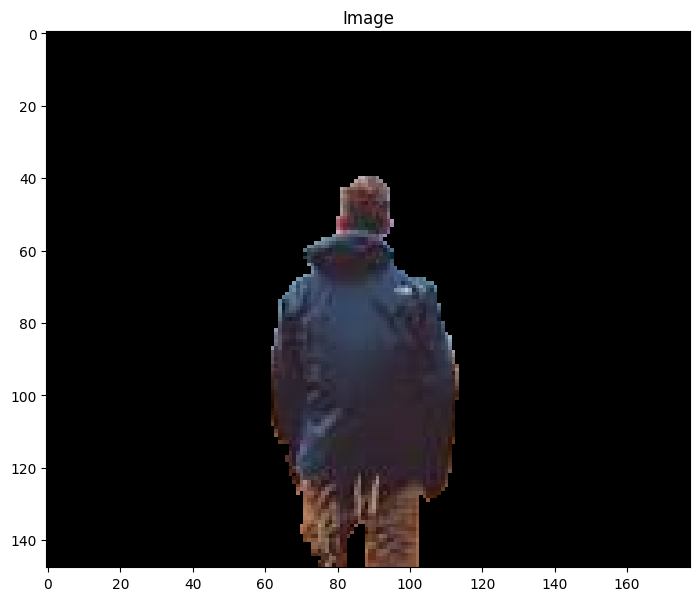

In [34]:
# Let the algorithm run for 5 iterations. Mode should be cv.GC_INIT_WITH_RECT since we are using rectangle.
# Grabcut modifies the mask image.
# In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above.
# So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (i.e. background) & all 1-pixels and 3-pixels are put to 1(i.e. foreground pixels).
# Now our final mask is ready. Just multiply it with input image to get the segmented image.
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)

In [10]:
im = cv2.imread('/content/h.jpg')

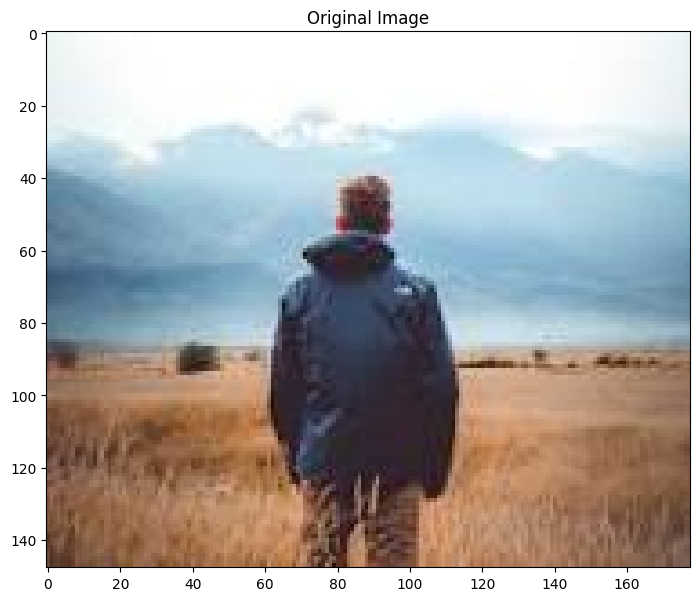

In [11]:
imshow("Original Image", im)